In [134]:
#importing library
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [89]:
#showing the dataset
df_2c=pd.read_csv('../input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
df_3c=pd.read_csv('../input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv')

In [90]:
df_2c

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [91]:
#getting informatoin about the dataset
df_2c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [145]:
#getting information about the dataset
df_3c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


# Preprocessing 

In [146]:
#copying the dataset
y_2c=df_2c['class'].copy()
y_3c=df_3c['class'].copy()
x=df_2c.drop('class',axis=1).copy()

In [147]:
y_2c.unique()

array(['Abnormal', 'Normal'], dtype=object)

In [148]:
y_3c.unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [149]:
#scaling the dataset
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [150]:
x_train,x_test,y_2c_train,y_2c_test,y_3c_train,y_3c_test=train_test_split(x,y_2c,y_3c,train_size=0.7,random_state=123)

In [151]:
model_2c=LogisticRegressionCV()
model_2c.fit(x_train,y_2c_train)

LogisticRegressionCV()

In [152]:
model_3c=LogisticRegressionCV()
model_3c.fit(x_train,y_3c_train)

LogisticRegressionCV()

# Generate Prediction

In [153]:
y_2c_pred=model_2c.predict(x_test)
y_2c_true=np.array(y_2c_test)

In [154]:
model_2c.score(x_test,y_2c_test)

0.8279569892473119

In [155]:

model_3c.score(x_test,y_3c_test)

0.8279569892473119

In [156]:
y_2c_test.unique()

array(['Normal', 'Abnormal'], dtype=object)

In [157]:
y_3c_test.unique()

array(['Normal', 'Hernia', 'Spondylolisthesis'], dtype=object)

In [158]:
y_3c_true=np.array(y_3c_test)
y_3c_pred=model_3c.predict(x_test)

In [159]:
cm_2c=confusion_matrix(y_2c_true,y_2c_pred)

In [160]:
cm_3c=confusion_matrix(y_3c_true,y_3c_pred)

In [161]:
clr_2c=classification_report(y_2c_true,y_2c_pred)
clr_3c=classification_report(y_3c_true,y_3c_pred)

In [162]:
cm_2c

array([[54, 11],
       [ 5, 23]])

In [163]:
cm_3c

array([[11,  9,  1],
       [ 5, 23,  0],
       [ 1,  0, 43]])

In [164]:
clr_2c

'              precision    recall  f1-score   support\n\n    Abnormal       0.92      0.83      0.87        65\n      Normal       0.68      0.82      0.74        28\n\n    accuracy                           0.83        93\n   macro avg       0.80      0.83      0.81        93\nweighted avg       0.84      0.83      0.83        93\n'

In [165]:
clr_3c

'                   precision    recall  f1-score   support\n\n           Hernia       0.65      0.52      0.58        21\n           Normal       0.72      0.82      0.77        28\nSpondylolisthesis       0.98      0.98      0.98        44\n\n         accuracy                           0.83        93\n        macro avg       0.78      0.77      0.77        93\n     weighted avg       0.82      0.83      0.82        93\n'

In [166]:
acc_2c=model_2c.score(x_test,y_2c_test)

In [167]:
acc_3c=model_3c.score(x_test,y_3c_test)

In [168]:
print('2-Class Accuracy:{:.2f}'.format(acc_2c))

2-Class Accuracy:0.83


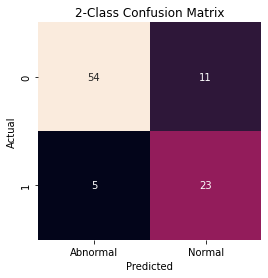

In [169]:
plt.figure(figsize=(4,4))
sns.heatmap(cm_2c,annot=True,fmt='g',cbar=False)
plt.xticks(np.arange(2)+0.5,['Abnormal','Normal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('2-Class Confusion Matrix')
plt.show()

In [170]:
y_2c.unique()

array(['Abnormal', 'Normal'], dtype=object)

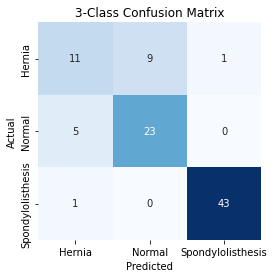

In [171]:
plt.figure(figsize=(4,4))
sns.heatmap(cm_3c,annot=True,fmt='g',cbar=False,vmin=0,cmap='Blues')
plt.xticks(np.arange(3)+0.5,['Hernia', 'Normal', 'Spondylolisthesis'])
plt.yticks(np.arange(3)+0.5,['Hernia', 'Normal', 'Spondylolisthesis'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('3-Class Confusion Matrix')
plt.show()

In [172]:
print(clr_2c)

              precision    recall  f1-score   support

    Abnormal       0.92      0.83      0.87        65
      Normal       0.68      0.82      0.74        28

    accuracy                           0.83        93
   macro avg       0.80      0.83      0.81        93
weighted avg       0.84      0.83      0.83        93



In [173]:
print(clr_3c)

                   precision    recall  f1-score   support

           Hernia       0.65      0.52      0.58        21
           Normal       0.72      0.82      0.77        28
Spondylolisthesis       0.98      0.98      0.98        44

         accuracy                           0.83        93
        macro avg       0.78      0.77      0.77        93
     weighted avg       0.82      0.83      0.82        93

